In [2]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [3]:
(x_treino,_) , (_,_) = tf.keras.datasets.cifar10.load_data()
x_treino = x_treino.astype('float32')/255.0
x_treino = x_treino.reshape(x_treino.shape[0],32,32,3)

In [4]:
#construir o gerador(falacioso)
def construir_gerador():
    modelo = tf.keras.Sequential()

    modelo.add(layers.Dense(8*8*256, use_bias = False, input_shape=(100,)))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Reshape((8,8,256)))

    modelo.add(layers.Conv2DTranspose(128,(5,5),strides = (2,2), padding = 'same', use_bias = False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Conv2DTranspose(128,(5,5),strides = (2,2), padding = 'same', use_bias = False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Conv2DTranspose(128,(5,5),strides = (1,1), padding = 'same', use_bias = False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())
    
    modelo.add(layers.Conv2DTranspose(64,(5,5), strides = (1,1), padding = 'same', use_bias = False))
    modelo.add(layers.BatchNormalization())
    modelo.add(layers.LeakyReLU())

    modelo.add(layers.Conv2DTranspose(3,(5,5), strides = (1,1), padding = 'same', use_bias = False, activation = 'tanh'))
    return modelo
    
gerador = construir_gerador()
gerador.summary()

C:\Users\mathe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16384)               │       1,638,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16384)               │          65,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 128)         │         409,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         409,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 32, 32, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 32, 32, 3)           │           4,800 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,553,728 (13.56 MB)

 Trainable params: 3,520,064 (13.43 MB)

 Non-trainable params: 33,664 (131.50 KB)

In [5]:
#construir o discriminador(detetive)
def construir_discriminador():
    modelo = tf.keras.Sequential()

    modelo.add(layers.Conv2D(64,(5,5), strides = (2,2), padding ='same', input_shape = [32,32,3]))
    modelo.add(layers.LeakyReLU())
    modelo.add(layers.Dropout(0.3))

    modelo.add(layers.Conv2D(128,(5,5), strides = (2,2), padding = 'same'))
    modelo.add(layers.LeakyReLU())
    modelo.add(layers.Dropout(0.3))

    modelo.add(layers.Conv2D(128,(5,5),strides = (1,1), padding = 'same'))
    modelo.add(layers.LeakyReLU())
    modelo.add(layers.Dropout(0.3))
    
    modelo.add(layers.Conv2D(64,(5,5),strides = (1,1), padding = 'same'))
    modelo.add(layers.LeakyReLU())
    modelo.add(layers.Dropout(0.3))

    modelo.add(layers.Flatten())
    modelo.add(layers.Dense(1))
    return modelo
discriminador = construir_discriminador()
discriminador.summary()

C:\Users\mathe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 16, 16, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 828,481 (3.16 MB)

 Trainable params: 828,481 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
cruz_entropia = tf.keras.losses.BinaryCrossentropy(from_logits = True)

def perda_discriminador(real_output,fake_output):
    real_loss = cruz_entropia(tf.ones_like(real_output), real_output)
    fake_loss = cruz_entropia(tf.zeros_like(fake_output),fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def perda_gerador(fake_output):
    return cruz_entropia(tf.ones_like(fake_output),fake_output)
    

In [7]:
#otimizadores
otimizador_gerador = tf.keras.optimizers.Nadam(1e-4)
otimizador_discriminador = tf.keras.optimizers.Nadam(1e-4)

gerador = construir_gerador()
discriminador = construir_discriminador()


In [8]:
#fução de treinamento
@tf.function
def passo_treino(imagens):
    ruido = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        imagens_geradas = gerador(ruido, training= True)
    
        real_output = discriminador(imagens, training = True)
        fake_output = discriminador(imagens_geradas, training= True)

        gen_loss = perda_gerador(fake_output)
        disc_loss = perda_discriminador(real_output, fake_output)

    gradientes_gerador = gen_tape.gradient(gen_loss, gerador.trainable_variables)
    gradientes_discriminador = disc_tape.gradient(disc_loss, discriminador.trainable_variables)

    otimizador_gerador.apply_gradients(zip(gradientes_gerador, gerador.trainable_variables))
    otimizador_discriminador.apply_gradients(zip(gradientes_discriminador, discriminador.trainable_variables))

In [9]:
#parametros
EPOCHS = 70
NOISE_DIM = 100
BATCH_SIZE = 256
BUFFER_SIZE = 60000


In [12]:
x_treino = (x_treino.astype("float32") - 127.5) / 127.5  

conjunto_dados_treino = tf.data.Dataset.from_tensor_slices(x_treino) \
    .shuffle(BUFFER_SIZE) \
    .batch(BATCH_SIZE)

In [ ]:
print("Iniciando treinamento GAN...")
for epoch in range(EPOCHS):
    for image_batch in conjunto_dados_treino:
        passo_treino(image_batch)
    print(f"época {epoch+1}/{EPOCHS} concluídas.")
print("Treinamento concluido")

Iniciando treinamento GAN...
época 1/70 concluídas.
época 2/70 concluídas.
época 3/70 concluídas.
época 4/70 concluídas.
época 5/70 concluídas.
época 6/70 concluídas.
época 7/70 concluídas.


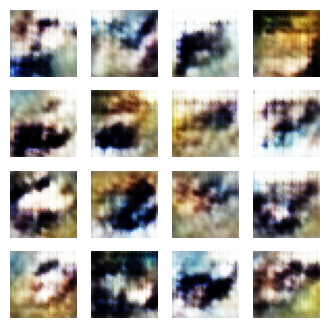

In [39]:

num_exemplo_gerar = 16
vetor_semente = tf.random.normal([num_exemplo_gerar, NOISE_DIM])

imagens_geradas = gerador(vetor_semente, training=False)

imagens_geradas = (imagens_geradas * 127.5 + 127.5).numpy().astype("uint8")

plt.figure(figsize=(4, 4))
for i in range(imagens_geradas.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(imagens_geradas[i])   # RGB, não precisa cmap
    plt.axis("off")
plt.show()
